(150, 4)
(150,)
[0 1 2]
[2.93190153 0.79182411 3.34454829]
[2.81376537 1.89741728 3.24148611]
[3.01706244 1.52583491 3.42228073]
[2.99265082 1.75629563 3.39507476]
[3.08013918 0.61377057 3.47522863]
[3.07590369 0.44502517 3.42282907]
[3.09124837 1.14585318 3.46513448]
[2.8677387  0.99172904 3.28549829]
[3.17790902 2.27193884 3.56217103]
[2.86355039 1.6920091  3.30289431]
[2.98588923 0.55328243 3.38911614]
[2.95492547 1.03844415 3.35898427]
[2.95254004 1.93913274 3.38320345]
[3.41210755 2.16649854 3.79857865]
[3.41478149 1.07655259 3.78013958]
[3.93169957 1.57730379 4.2132651 ]
[3.20348963 0.5490202  3.54886643]
[2.863132   0.75829039 3.26325992]
[2.90511915 0.74752158 3.29133846]
[3.17185045 0.26270691 3.53448621]
[2.60368721 1.03063757 3.05139229]
[2.98360677 0.32354048 3.34593045]
[3.44860021 0.95392955 3.8158003 ]
[2.46280623 1.16405016 2.86031005]
[2.85992486 1.02434946 3.26683518]
[2.67936865 1.87202016 3.119328  ]
[2.69526915 0.94424833 3.08843554]
[2.84843363 0.78268297 3.268661

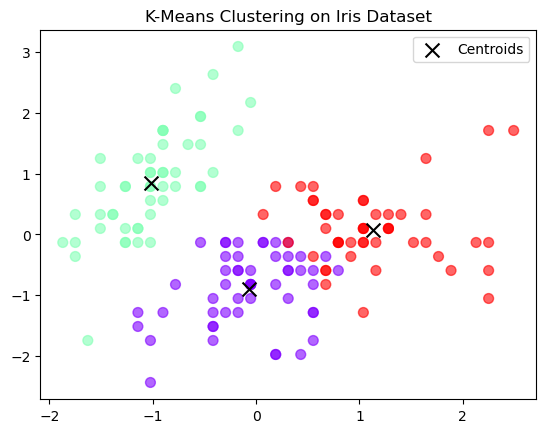

[4.20798514]
[4.01805136]
[4.24203265]
[4.19464446]
[4.34722921]
[4.29040328]
[4.31487702]
[4.14083753]
[4.30755781]
[4.10511472]
[4.25695567]
[4.2149454]
[4.16056201]
[4.56831924]
[4.6199812]
[5.03283214]
[4.4121607]
[4.12690982]
[4.1457321]
[4.41200316]
[3.90130977]
[4.22111966]
[4.68132321]
[3.70500409]
[4.12547219]
[3.8973283]
[3.9456319]
[4.13182365]
[4.0805907]
[4.14613654]
[4.04166053]
[3.79739942]
[4.9133737]
[4.91983379]
[4.01765585]
[4.11223786]
[4.08530848]
[4.47600023]
[4.35759313]
[4.09269237]
[4.20741978]
[4.34201344]
[4.42995536]
[3.88312376]
[4.22099015]
[3.99050294]
[4.45868323]
[4.27014133]
[4.29301599]
[4.10265406]
[1.65740409]
[1.44490936]
[1.36061567]
[2.17818123]
[1.0893831]
[1.58549054]
[1.49160602]
[2.89054392]
[1.35582302]
[2.05175318]
[3.19198046]
[1.43568964]
[2.33766232]
[1.24728722]
[1.92049555]
[1.47755571]
[1.54644826]
[1.95025219]
[1.79061461]
[2.10872571]
[1.30340869]
[1.53708513]
[1.22430198]
[1.45825513]
[1.41507366]
[1.35823778]
[1.2452261]
[0.945288

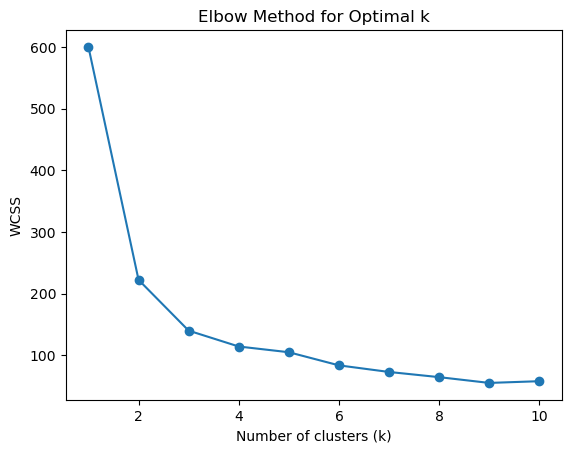

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance
 
# Function for K-means clustering
def kmeans(X, k, max_iters=100):
    n_samples, n_features = X.shape
    
    # Randomly initialize centroids by selecting 'k' random points
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    # Store the cluster assignments
    cluster_assignments = np.zeros(n_samples)
    
    for _ in range(max_iters):
        # Assignment Step: Assign each point to the nearest centroid
        for i in range(n_samples):
            # Calculate the distance between X[i] and each centroid
            distances = np.array([euclidean_distance(X[i], centroid) for centroid in centroids])
            # print(distances)
            # Assign the point to the nearest centroid (smallest distance)
            cluster_assignments[i] = np.argmin(distances)
            # print(cluster_assignments)
       
        # Update Step: Recompute centroids as the mean of the points in each cluster
        new_centroids = np.array([X[cluster_assignments == j].mean(axis=0) for j in range(k)])
        # print(new_centroids)
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return cluster_assignments, centroids

# Function to compute WCSS (Within-Cluster Sum of Squares)
def compute_wcss(X, cluster_assignments, centroids):
    wcss = 0
    for i in range(len(X)):
        centroid = centroids[int(cluster_assignments[i])]
        wcss += np.linalg.norm(X[i] - centroid) ** 2
    return wcss

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Using only the feature matrix
y = iris.target
print(X.shape)
print(y.shape)
print(np.unique(y))


# Standardizing the dataset for better results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set number of clusters and fit K-means
k = 3  # We know Iris has 3 species
cluster_assignments, centroids = kmeans(X_scaled, k)

# Compute WCSS for the final clustering
wcss = compute_wcss(X_scaled, cluster_assignments, centroids)
print(f"WCSS: {wcss}")

# Plotting the clusters and centroids (using the first two features for visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_assignments, cmap='rainbow', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

# Elbow Method to determine the optimal number of clusters
wcss_values = []
K = range(1, 11)  # Trying k values from 1 to 10
for k in K:
    cluster_assignments, centroids = kmeans(X_scaled, k)
    wcss = compute_wcss(X_scaled, cluster_assignments, centroids)
    wcss_values.append(wcss)

# Plotting the Elbow curve
plt.plot(K, wcss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()
